## Predicting E-Commerce Best Sellers: A Comparative Study of Logistic Regression and Random Forest Models
#### By Philip Vishnevsky
#### For ITCS-3156

## Abstract

This project uses machine learning to predict which products will become best sellers on an e-commerce platform. Starting with about 80,000 products, it applies two classification methods—Logistic Regression and Random Forest—to features like price, discount percentage, and product category. After handling missing data, standardizing numerical features, and encoding categories, the models are trained on 70% of the data, validated on 10%, and tested on 20%. Results show that the Random Forest model outperforms Logistic Regression, especially in identifying best sellers. Key factors linked to best-selling products include lower prices (under $25), higher discounts (over 15%), and certain categories such as Home & Kitchen. These insights can help inform pricing, promotions, and product mix strategies. These findings can help businesses understand consumer purchasing patterns, and can help sales platforms optimize their methods. 

# 1. Introduction

In today’s highly competitive e-commerce landscape, understanding what makes certain products stand out as "Best Sellers" is crucial for both online retailers and researchers. Products that achieve bestseller status often share common characteristics—ranging from pricing strategies and discount patterns to the categories in which they are sold. By analyzing these features, data-driven methods can help us predict which products are likely to become best sellers. This project explores the application of two accessible machine learning techniques—Logistic Regression and Random Forest—to model best-seller likelihood using a dataset of tens of thousands of products. Our goal is not only to build predictive models, but also to compare their performance, interpret their results, and determine which approach better captures the underlying relationships that drive a product’s success.

# 2. Dataset

## 2.1 Dataset Introduction

The dataset, sourced from Kaggle, a publicly available repository, contains detailed information on approximately 80,000 products from an e-commerce platform. It includes labels such as product price, percentage discount, product category, and other attributes that may influence consumer purchasing decisions. The size and depth of the dataset allow for a detailed analysis of a wide range of product types and price points. Missing values, formatting inconsistencies, and errors have already been addressed, creating a foundation for reliable analysis.

## 2.2 Data Visualization

### 2.2.0 Import Utils

In [39]:
# %pip install numpy pandas matplotlib scikit-learn

from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### 2.2.1 Load Dataset

We use `read_csv` from `pandas` to load our data from the CSV file.

In [40]:
products = pd.read_csv(r'products.csv', low_memory=False)

Then, we can `display()` the `products` dataframe

In [41]:
display(products)

,Unnamed: 0,rank,rank_category,price_usd,pct_discount,qty_sold,product_title,category_name,color_count,img_source_url,black_friday_off_usd
0,0,#1 Best Sellers,Give Gifts,2.03,22.0,NaN,1pc Rechargeable Deep Tissue Muscle Handheld M...,appliances,NaN,NaN,NaN
1,1,#4 Best Sellers,Top rated Portable Fans,6.48,20.0,NaN,1pc Portable Hanging Neck Fan,appliances,NaN,NaN,NaN
2,2,NaN,NaN,1.80,NaN,400.0,1pc Pink Colored Curved Eyelash Curler False E...,appliances,NaN,NaN,NaN
3,3,NaN,NaN,0.88,72.0,5600.0,1 Mini Portable Handheld Fan With 2 Aa Batteri...,appliances,NaN,NaN,NaN
4,4,#6 Best Sellers,Oral Irrigators,12.06,40.0,NaN,"Wit Water Flosser,Portable Oral Irrigator With...",appliances,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
82100,82100,NaN,NaN,35.99,10.0,NaN,"L Shape Cat Scratcher, 26.8 Inch Cat Scratcher...",pet_supplies,NaN,NaN,NaN
82101,82101,NaN,NaN,49.99,26.0,NaN,"Cat Scratching Post – Beige, Large 32 Inch To...",pet_supplies,NaN,NaN,NaN
82102,82102,NaN,NaN,53.19,30.0,NaN,"Cat Tower, Cat Tree For Indoor Cats, 45.3-Inch...",pet_supplies,NaN,NaN,NaN
82103,82103,NaN,NaN,37.99,30.0,NaN,Cat Scratching Post 33 Inch Nature Sisal Cat S...,pet_supplies,NaN,NaN,NaN


### 2.2.2 Visualizations

#### Plots of Distributions of Prices, Discounts, and Qty. Sold

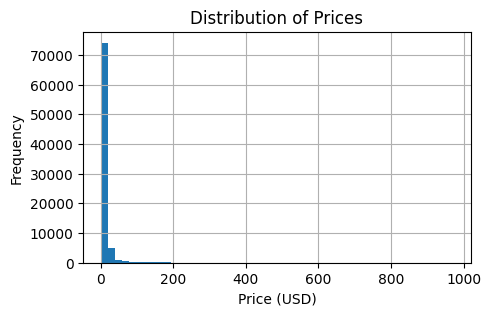

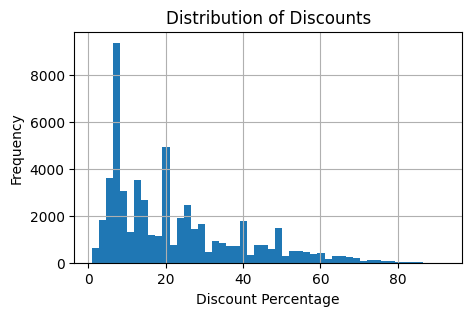

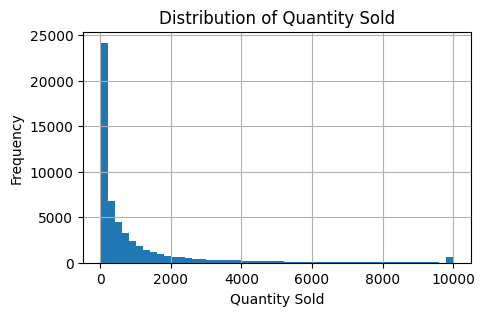

In [42]:
# Plot the distribution of prices
plt.figure(figsize=(5, 3))
products['price_usd'] = pd.to_numeric(products['price_usd'], errors='coerce')
products['price_usd'].dropna().hist(bins=50)
plt.title('Distribution of Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of discounts
plt.figure(figsize=(5, 3))
products['pct_discount'].dropna().hist(bins=50)
plt.title('Distribution of Discounts')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of quantity sold
plt.figure(figsize=(5, 3))
products['qty_sold'].dropna().hist(bins=50)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()

#### List of Unique Product Categories

In [43]:
# Print all unique product categories
unique_categories = products['category_name'].unique()
print(f"Product Categories: \n {unique_categories} \n")
print(f"Number of Categories: {unique_categories.size}")

Product Categories: 
 ['appliances' 'office_and_school_supplies' 'underwear_and_sleepwear'
 'mens_clothes' 'curve' 'swimwear' 'womens_clothing' 'sports_and_outdoors'
 'home_textile' 'beauty_and_health' 'home_and_kitchen'
 'jewelry_and_accessories' 'electronics' 'toys_and_games' 'shoes'
 'baby_and_maternity' 'bags_and_luggage' 'kids' 'automotive'
 'tools_and_home_improvement' 'pet_supplies'] 

Number of Categories: 21


We see there are 21 unique categories.

We are interested in the Best Sellers, so we will also plot the counts of Best Sellers in each product category.

#### Plot of Counts of Best Sellers by Category

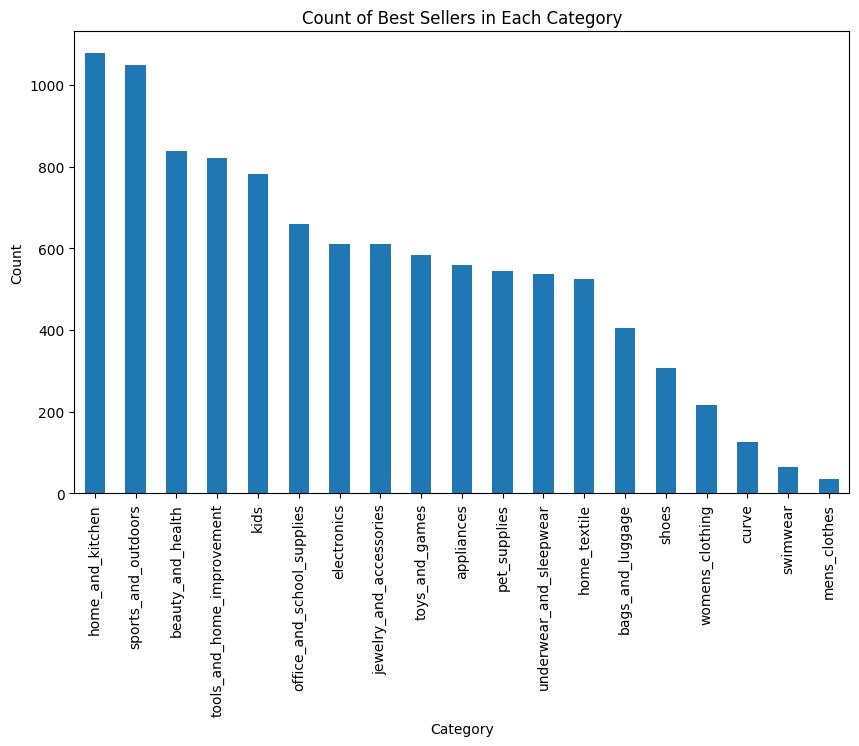

,Unnamed: 0,rank,rank_category,price_usd,pct_discount,qty_sold,product_title,category_name,color_count,img_source_url,black_friday_off_usd
0,0,#1 Best Sellers,Give Gifts,2.03,22.0,NaN,1pc Rechargeable Deep Tissue Muscle Handheld M...,appliances,NaN,NaN,NaN
1,1,#4 Best Sellers,Top rated Portable Fans,6.48,20.0,NaN,1pc Portable Hanging Neck Fan,appliances,NaN,NaN,NaN
4,4,#6 Best Sellers,Oral Irrigators,12.06,40.0,NaN,"Wit Water Flosser,Portable Oral Irrigator With...",appliances,NaN,NaN,NaN
5,5,#10 Best Sellers,Refrigerators & Freezers,2.70,NaN,NaN,"1pc Ice Pop Mold, Plastic Ice Cream Mold, Froz...",appliances,NaN,NaN,NaN
6,6,#8 Best Sellers,Other Household Appliances,3.50,NaN,NaN,"Mini Pocket Bluetooth Thermal Printer, Portabl...",appliances,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
81514,81514,#6 Best Sellers,Aquarium Appliances,3.76,20.0,NaN,Vibrant Aquarium Enhancement: Waterproof Fluo...,pet_supplies,NaN,NaN,0.94
81592,81592,#9 Best Sellers,Pet Accessories Sets,3.36,20.0,NaN,1 Set Black Dog Paw Print Happy Birthday Party...,pet_supplies,NaN,NaN,0.84
81601,81601,#1 Best Sellers,Small Animal Cages & Accessories,0.86,67.0,NaN,"1pc/2pcs Rabbit Grass Mat For Hamsters, Lop-Ea...",pet_supplies,NaN,NaN,1.74
81614,81614,#1 Best Sellers,Small Pet Clothg,2.52,10.0,NaN,1pc Strawberry Design Rabbit Tank For Small An...,pet_supplies,NaN,NaN,0.28


Number of Bestsellers: 10353


In [44]:
# Extract bestseller information
bestsellers = products[products['rank'].str.contains('Best Sellers', na=False)]

# Plot the count of bestsellers in each category
plt.figure(figsize=(10, 6))
bestseller_counts = bestsellers['category_name'].value_counts()
bestseller_counts.plot(kind='bar')
plt.title('Count of Best Sellers in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
display(bestsellers)

# Print the number of bestsellers
print(f"Number of Bestsellers: {bestsellers.shape[0]}")

We see that, unsurprisingly, the most popular categories are Home & Kitchen, Sports & Outdoors, Beauty & Health, and Tools & Home Improvement, each having over 800 best-sellers.

Next, we can look at all the #1 Best Sellers per category.

#### Plot of Counts of #1 Best Sellers by Category

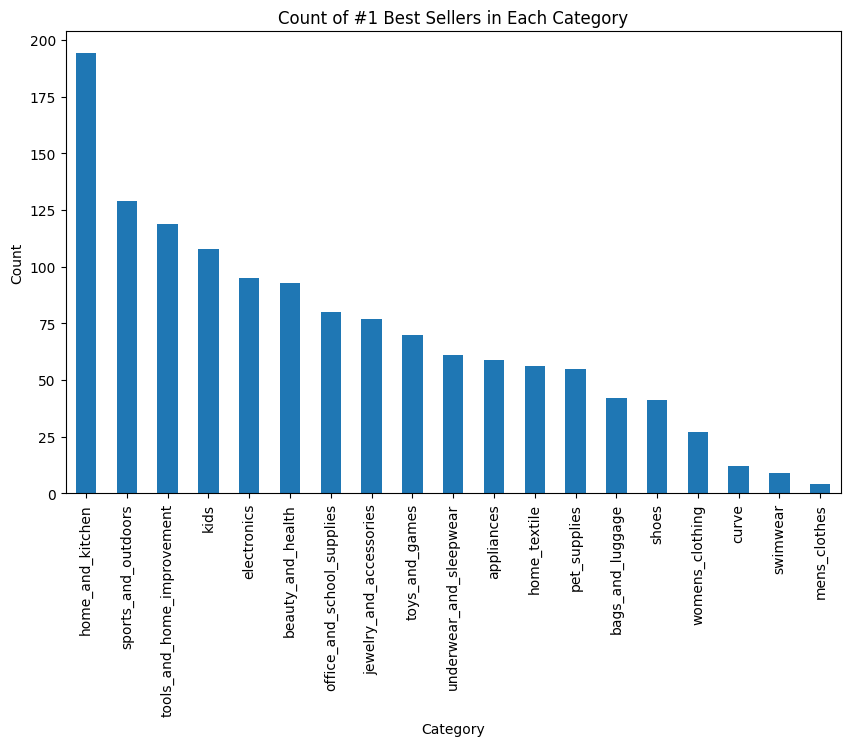

Number of #1 Best Sellers: 1331


In [45]:
# Filter for #1 Best Sellers
number_one_bestsellers = bestsellers[bestsellers['rank'] == '#1 Best Sellers']

# Plot the count of #1 bestsellers in each category
plt.figure(figsize=(10, 6))
number_one_bestseller_counts = number_one_bestsellers['category_name'].value_counts()
number_one_bestseller_counts.plot(kind='bar')
plt.title('Count of #1 Best Sellers in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Print the number of #1 Best Sellers
print(f"Number of #1 Best Sellers: {number_one_bestsellers.shape[0]}")

We see many of the same trends in regards to top selling product categories.

We are also interested in seeing any correlation between the prices of products and their status as a Best Seller.

#### Plot of Average $ Prices of Best Sellers by Category

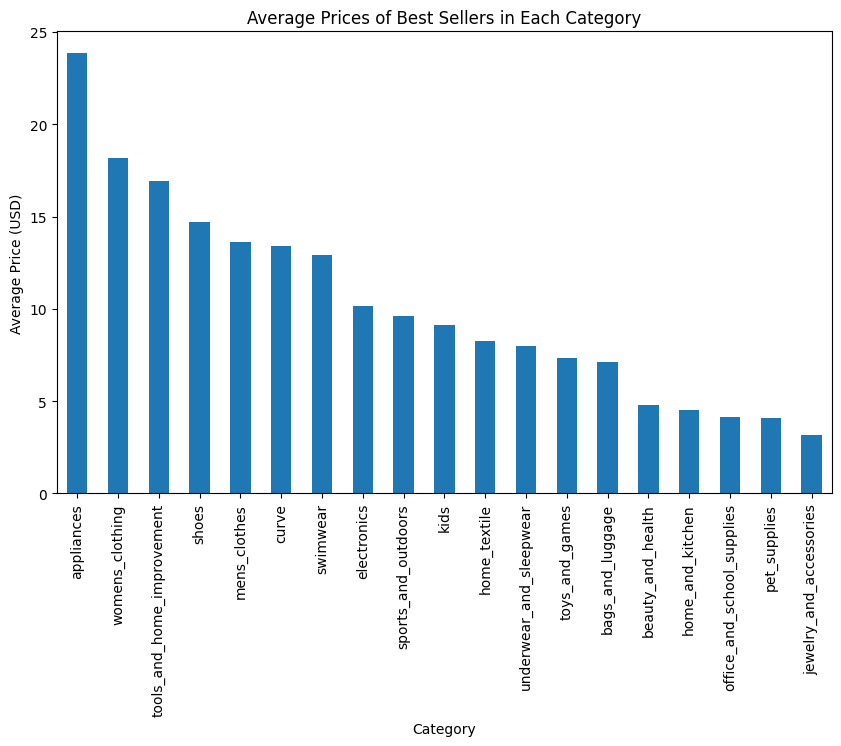

In [46]:
# Calculate the average price of best sellers in each category
average_prices = bestsellers.groupby('category_name')['price_usd'].mean().sort_values(ascending=False)

# Plot the average prices
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar')
plt.title('Average Prices of Best Sellers in Each Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.show()

#### Plot of Average % Discount of Best Sellers by Category

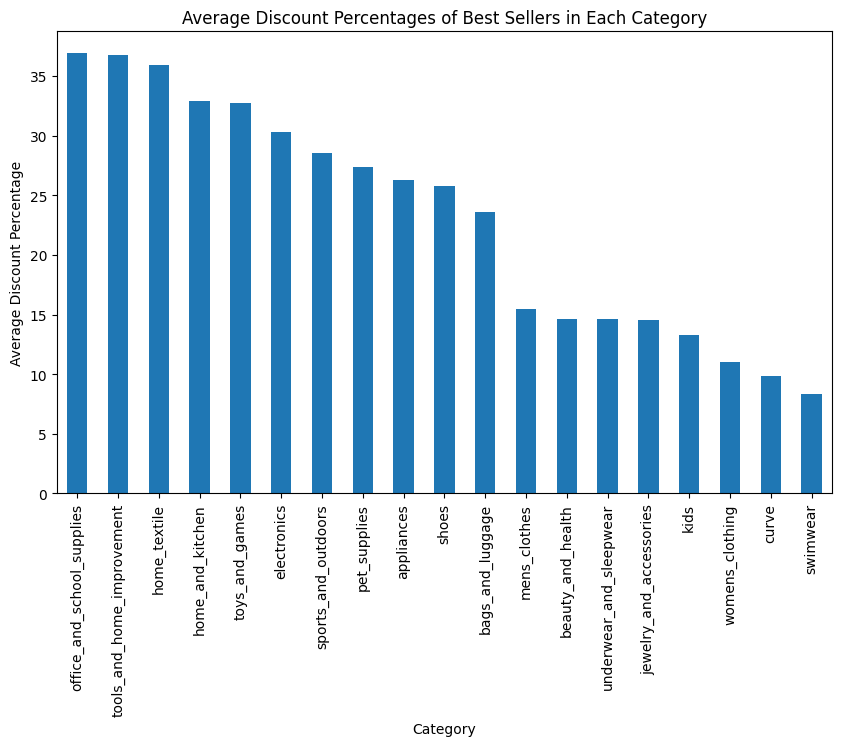

In [47]:
# Calculate the average discount percentage of best sellers in each category
average_discounts = bestsellers.groupby('category_name')['pct_discount'].mean().sort_values(ascending=False)

# Plot the average discount percentages
plt.figure(figsize=(10, 6))
average_discounts.plot(kind='bar')
plt.title('Average Discount Percentages of Best Sellers in Each Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.show()

### 2.2.3 Trends

#### We observe the following trends in Best Sellers from the above graphs:

1. **Distribution of Prices**:
    - The prices of Best-Selling products are mostly concentrated at the lower end, with all priced under $25.

2. **Distribution of Discounts**:
    - Discounts are common, with a significant number of products having discounts over 15%.

3. **Distribution of Quantity Sold**:
    - The quantity sold data is sparse, with many missing values, making it difficult to draw conclusions based on that data. All of the Best Sellers do not have any quantity-sold data.
  
4. **Counts of Best Sellers**:
   - There are `10353` total Best Sellers, with `1331` #1 Best Sellers.

5. **Count of Best Sellers in Each Category**:
    - Categories like Home & Kitchen, Sports & Outdoors, Beauty & Health, and Tools & Home Improvement have the highest number of best sellers, having over 800 products each.

6. **Count of #1 Best Sellers in Each Category**:
    - Similar to the previous trend, Home & Kitchen, Sports & Outdoors, and Tools & Home Improvement have the highest number of #1 best sellers, with over 100 products each.

7. **Average Prices of Best Sellers in Each Category**:
    - Categories like Appliances, Women's Clothing, and Tools & Home Improvement have higher average prices for best sellers compared to other categories.

## 2.3 Data Preprocessing

### 2.3.1 Dataframe Cleanup

We can see from the above `display()` there are unnecessary columns present. We can drop those. We will also ensure that all our datapoints have the correct types.

In [48]:
# Drop unnecessary columns from the dataframe
columns_to_drop = ['Unnamed: 0', 'color_count', 'img_source_url', 'black_friday_off_usd']
products.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Ensure all elements in each column have the same type
products['price_usd'] = pd.to_numeric(products['price_usd'], errors='coerce')
products['rank'] = products['rank'].astype(str)
products['rank_category'] = products['rank_category'].astype(str)
products['product_title'] = products['product_title'].astype(str)
products['category_name'] = products['category_name'].astype(str)

# Display the updated dataframe
display(products)

,rank,rank_category,price_usd,pct_discount,qty_sold,product_title,category_name
0,#1 Best Sellers,Give Gifts,2.03,22.0,NaN,1pc Rechargeable Deep Tissue Muscle Handheld M...,appliances
1,#4 Best Sellers,Top rated Portable Fans,6.48,20.0,NaN,1pc Portable Hanging Neck Fan,appliances
2,nan,nan,1.80,NaN,400.0,1pc Pink Colored Curved Eyelash Curler False E...,appliances
3,nan,nan,0.88,72.0,5600.0,1 Mini Portable Handheld Fan With 2 Aa Batteri...,appliances
4,#6 Best Sellers,Oral Irrigators,12.06,40.0,NaN,"Wit Water Flosser,Portable Oral Irrigator With...",appliances
...,...,...,...,...,...,...,...
82100,nan,nan,35.99,10.0,NaN,"L Shape Cat Scratcher, 26.8 Inch Cat Scratcher...",pet_supplies
82101,nan,nan,49.99,26.0,NaN,"Cat Scratching Post – Beige, Large 32 Inch To...",pet_supplies
82102,nan,nan,53.19,30.0,NaN,"Cat Tower, Cat Tree For Indoor Cats, 45.3-Inch...",pet_supplies
82103,nan,nan,37.99,30.0,NaN,Cat Scratching Post 33 Inch Nature Sisal Cat S...,pet_supplies


### 2.3.2 Data Splitting

We will split the data using the `train_test_split` function from the `ScikitLearn` package.

By running the function twice, we get the training, validation, and testing datasets.

The `get_train_vld_test()` function takes a DataFrame and splits it into three separate datasets - training, validation, and test sets. It first splits off 20% of the data for testing, then takes 10% of the remaining data for validation, leaving the remaining 70% for training. The `random_state` parameter ensures these splits are reproducible. This splitting process is essential for evaluating machine learning models by having separate data for training, validating hyperparameters, and final testing.

In [49]:
from sklearn.model_selection import train_test_split

def get_train_vld_test(df: pd.DataFrame, test_size: float = 0.2, vld_size: float = 0.1, random_state: int = 42) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Split the dataframe into training, validation, and test sets.

    Parameters:
    df (pd.DataFrame): The dataframe to split.
    test_size (float): The proportion of the dataset to include in the test split.
    vld_size (float): The proportion of the training dataset to include in the validation split.
    random_state (int): Random seed for reproducibility.

    Returns:
    Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]: The training, validation, and test dataframes.
    """
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
    train_df, vld_df = train_test_split(train_df, test_size=vld_size, random_state=random_state)
    
    return train_df, vld_df, test_df

# 3. Methods

## 3.1 Method One: Logistic Regression

#### Logistic Regression
The logistic regression model will be used to predict the binary outcome of whether a product is a best seller (1) or not (0) based on our numeric features like `price_usd` and `pct_discount`, and categorical features like `category_name` (which will need to be one-hot encoded). Since logistic regression works by estimating the probability of a binary outcome using a logistic function, it will help us understand the relationship between our product features and Best Seller status. For example, it may reveal that higher discounts increase the probability of being a best seller, or that certain price points are more likely to result in best seller status. The model will output a probability between 0 and 1, which we can threshold (around 0.5) to make the final Best Seller prediction.



## 3.2 Method Two: Random Forest Classifier

#### Random Forest Classifier
The random forest approach will be used as the other method for this classification problem, by creating a group of decision trees, where each tree is trained on a random subset of the data and features. This method can capture more complex, non-linear relationships between our product features and Best Seller status that logistic regression might miss. For instance, it might discover that specific combinations of price ranges and categories are particularly indicative of Best Seller status. Random forests also provide feature importance scores, which will help us understand which product characteristics (price, discount, category, etc.) are most crucial in determining Best Seller status. Also, random forests are less sensitive to outliers and don't require the same strict assumptions about feature distributions as logistic regression.

# 4. Results

Below, we will perform the training, testing, and evaluation of both methods. We will train each model on the `train_df`, then use the `vld_df` and `test_df` for predictions.

## 4.1 Setup

### 4.1.0 Setup Code

Below, we will import the preprocessing, model, and evaluation libraries.

In [50]:
# Import preprocessing libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import evaluation libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve

We need an additional step before we can preprocess the data. Currently, all the Best Sellers have a string ranking them as #1-#10 Best Seller. Since we are interested in all Best Sellers, we will use the below function to assign a quantitative value to each product.

The `is_bestseller` function takes a `rank_value` as input and returns `1` if the `rank_value` indicates a bestseller, otherwise it returns `0`. The function first checks if the `rank_value` is `NaN` (Not a Number), in which case it returns `0`. If the `rank_value` is not `NaN`, it then checks if the string 'Best Sellers' is present in the `rank_value`. If it is, the function returns `1`, indicating that the product is a bestseller. If neither condition is met, the function returns `0`.

In [51]:
def is_bestseller(rank_value):
    """Return 1 if 'rank' indicates a bestseller, else 0."""
    if pd.isna(rank_value):
        return 0
    # Check if 'Best Sellers' is in the string
    if 'Best Sellers' in str(rank_value):
        return 1
    return 0

We will use the `get_train_vld_test()` function defined earlier on the `products` dataframe to output our training, validation, and test sets.

In [52]:
# Get the training, validation, and test sets
train_df, vld_df, test_df = get_train_vld_test(products)

numeric_features = ['price_usd', 'pct_discount']
categorical_features = ['category_name']

The `preprocess_data()` function prepares the raw dataset for machine learning by handling missing values in the `pct_discount` and `price_usd` fields, converting the categorical `category_name` field into numerical values through one-hot encoding, and standardizing numerical features so they're on the same scale. It then combines these processed features into a single matrix X and creates a binary target variable y that indicates whether each product is a bestseller (1) or not (0). The function ultimately returns these two processed arrays that are ready to be fed into our machine learning models.

In [53]:
def preprocess_data(train_df: pd.DataFrame, vld_df: pd.DataFrame, test_df: pd.DataFrame, numeric_features: List[str], categorical_features: List[str]) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, ColumnTransformer]:
    """ Preprocess the data for training, validation, and testing. """
    # Define target
    for df in [train_df, vld_df, test_df]:
        df['target'] = df['rank'].apply(is_bestseller)

    # Define features to use
    #FEATURES = ['category_name', 'price_usd', 'pct_discount']
    FEATURES = numeric_features + categorical_features
    TARGET = 'target'

    X_train = train_df[FEATURES].copy()
    y_train = train_df[TARGET].copy()

    X_vld = vld_df[FEATURES].copy()
    y_vld = vld_df[TARGET].copy()

    X_test = test_df[FEATURES].copy()
    y_test = test_df[TARGET].copy()

    # Define pipelines for numeric and categorical transformations
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Impute numeric features with median
        ('scaler', StandardScaler())  # Scale numeric features
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical features with mode
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
    ])

    # Combine into a single ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # Impute directly on X_vld using median from training data or a known constant
    for col in numeric_features:
        median_val = X_train[col].median()
        X_vld[col] = X_vld[col].fillna(median_val)

    # Impute directly on X_test using median from training data or a known constant
    for col in numeric_features:
        median_val = X_train[col].median()
        X_test[col] = X_test[col].fillna(median_val)
    
    return X_train, y_train, X_vld, y_vld, X_test, y_test, preprocessor

The `plot_learning_curve()` function will plot the learning curve for each model.

In [54]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid(True)

    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

Get the preprocessed training, validation, and testing datasets.

In [55]:
X_train, y_train, X_vld, y_vld, X_test, y_test, preprocessor = preprocess_data(train_df, vld_df, test_df, numeric_features, categorical_features)

### 4.1.1 Training Logistic Regression

Finally, we are ready to train the Logistic Regression model.

Logistic Regression
Training Accuracy: 0.8755


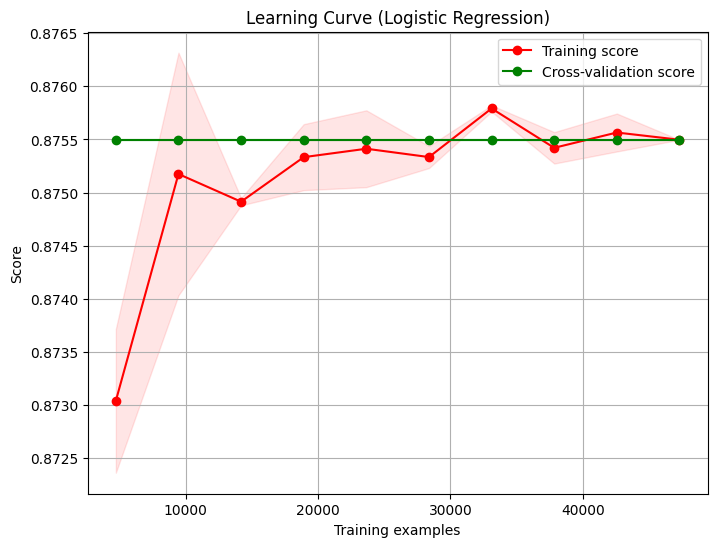

In [56]:
# Logistic Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=128, random_state=42))
])

# Fit models
lr_pipeline.fit(X_train, y_train)

# Print the training accuracy
train_accuracy = lr_pipeline.score(X_train, y_train)
print(f"Logistic Regression\nTraining Accuracy: {train_accuracy:.4f}")

# Plot the learning curve
plot_learning_curve(lr_pipeline, X_train, y_train, "Learning Curve (Logistic Regression)")

### 4.1.2 Training Random Forest

Finally, we are ready to train the Random Forest model.

Random Forest
Training Accuracy: 0.9291


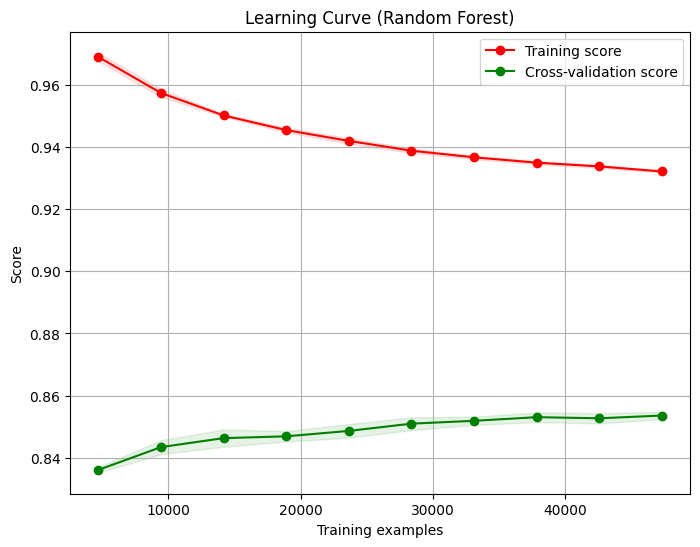

In [57]:
# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=128, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

# Print the training accuracy
train_accuracy_rf = rf_pipeline.score(X_train, y_train)
print(f"Random Forest\nTraining Accuracy: {train_accuracy_rf:.4f}")

# Plot the learning curve
plot_learning_curve(rf_pipeline, X_train, y_train, "Learning Curve (Random Forest)")

## 4.2 Testing

### 4.2.0 Plot Functions

The `plot_decision_boundary()` function is used for plotting the decision boundary for the numeric features we are interested in:  
`price_usd` and `pct_discount`.

In [58]:
def plot_decision_boundary(X, y, pipeline, title, numeric_features=['price_usd', 'pct_discount']):
    """
    Plot the decision boundary for the first two numeric features in original scale.
    Assumes:
    - 'pipeline' is a trained Pipeline with a 'preprocessor' (ColumnTransformer) and 'classifier'.
    - 'numeric_features' are the two numeric feature names used for plotting.
    """

    # Check for NaNs in X
    if X[numeric_features].isna().any().any():
        raise ValueError("NaNs detected in the numeric features. Please impute or remove NaNs before plotting.")

    # Convert X, y to numpy arrays (only numeric features for plotting)
    X_vals = np.array(X[numeric_features])
    y_vals = np.array(y)

    # If there's no variation, add a small epsilon
    h = 0.05
    x_min, x_max = X_vals[:, 0].min(), X_vals[:, 0].max()
    y_min, y_max = X_vals[:, 1].min(), X_vals[:, 1].max()

    # Double check for NaN or infinite after adjustments
    if (np.isnan(x_min) or np.isnan(x_max) or np.isnan(y_min) or np.isnan(y_max)):
        raise ValueError("Invalid range due to NaNs. Check your data.")
    if np.isinf(x_min) or np.isinf(x_max) or np.isinf(y_min) or np.isinf(y_max):
        raise ValueError("Invalid range due to infinite values. Check your data.")

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Extract the preprocessor and classifier
    preprocessor = pipeline.named_steps['preprocessor']
    classifier = pipeline.named_steps['classifier']

    # Create a DataFrame for the grid in original scale
    grid_original = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid_original, columns=numeric_features)

    # Suppose you have a variable default_cat which is a category present in training
    default_cat = X_train['category_name'].mode()[0]
    grid_df['category_name'] = default_cat

    # Transform the grid using the pipeline’s preprocessor
    grid_transformed = preprocessor.transform(grid_df)

    # Predict with the classifier
    Z = classifier.predict(grid_transformed)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_vals[:, 0], X_vals[:, 1], c=y_vals, edgecolors='k', s=20, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel(numeric_features[0])
    plt.ylabel(numeric_features[1])
    plt.show()

### 4.2.1 Logistic Regression

In [59]:
# Validate Logistic Regression
y_vld_pred_lr = lr_pipeline.predict(X_vld)
print("Logistic Regression Validation Accuracy:", accuracy_score(y_vld, y_vld_pred_lr))
print("Validation Set Classification Report (Logistic Regression):")
print(classification_report(y_vld, y_vld_pred_lr, zero_division=0))

Logistic Regression Validation Accuracy: 0.8623839244938347
Validation Set Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      5665
           1       0.00      0.00      0.00       904

    accuracy                           0.86      6569
   macro avg       0.43      0.50      0.46      6569
weighted avg       0.74      0.86      0.80      6569



In [60]:
# Test Logistic Regression
y_test_pred_lr = lr_pipeline.predict(X_test)
print("Logistic Regression Testing Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("Testing Set Classification Report (Logistic Regression):")
print(classification_report(y_test, y_test_pred_lr, zero_division=0))

Logistic Regression Testing Accuracy: 0.8727848486693868
Testing Set Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     14332
           1       0.00      0.00      0.00      2089

    accuracy                           0.87     16421
   macro avg       0.44      0.50      0.47     16421
weighted avg       0.76      0.87      0.81     16421



### 4.2.2 Random Forest

In [61]:
# Validate Random Forest
y_vld_pred_rf = rf_pipeline.predict(X_vld)
print("Random Forest Validation Accuracy:", accuracy_score(y_vld, y_vld_pred_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_vld, y_vld_pred_rf))

Random Forest Validation Accuracy: 0.8422895417871822
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5665
           1       0.32      0.13      0.19       904

    accuracy                           0.84      6569
   macro avg       0.60      0.55      0.55      6569
weighted avg       0.80      0.84      0.81      6569



In [62]:
# Test Random Forest
y_test_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest Validation Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))

Random Forest Validation Accuracy: 0.84909567017843
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     14332
           1       0.28      0.12      0.16      2089

    accuracy                           0.85     16421
   macro avg       0.58      0.54      0.54     16421
weighted avg       0.80      0.85      0.82     16421



## 4.3 Results

The `plot_decision_boundary()` function creates a mesh grid over the feature space and uses the classifier to predict the class for each point in the grid. The decision boundaries are then plotted using a contour plot. The function also plots the original data points with different colors for each class.

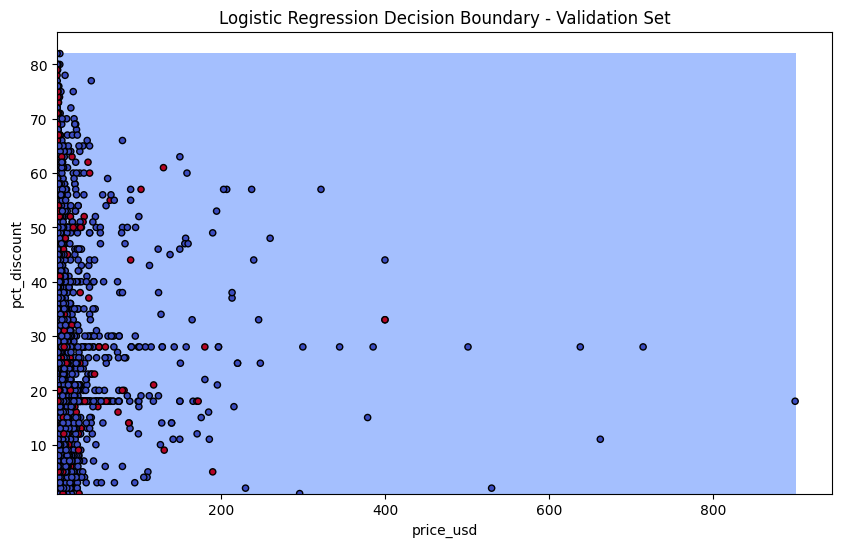

In [63]:
plot_decision_boundary(X_vld, y_vld, lr_pipeline, "Logistic Regression Decision Boundary - Validation Set")

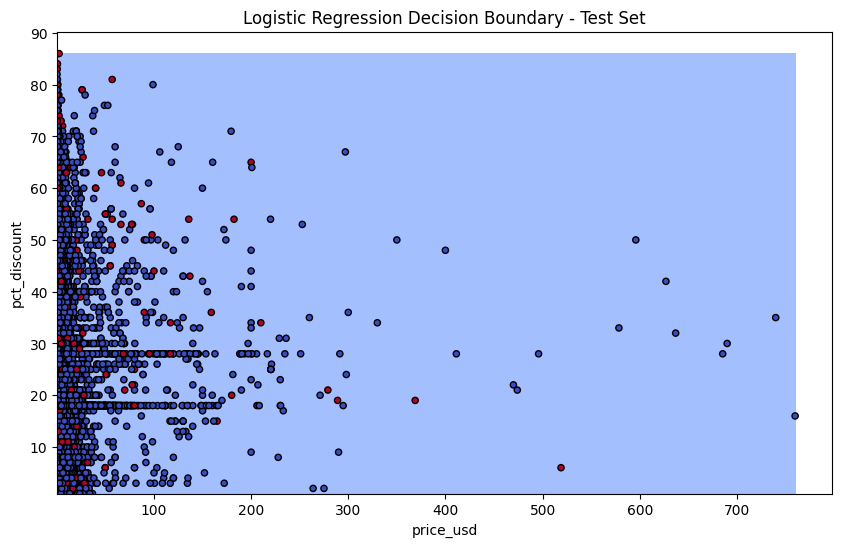

In [64]:
plot_decision_boundary(X_test, y_test, lr_pipeline, "Logistic Regression Decision Boundary - Test Set")

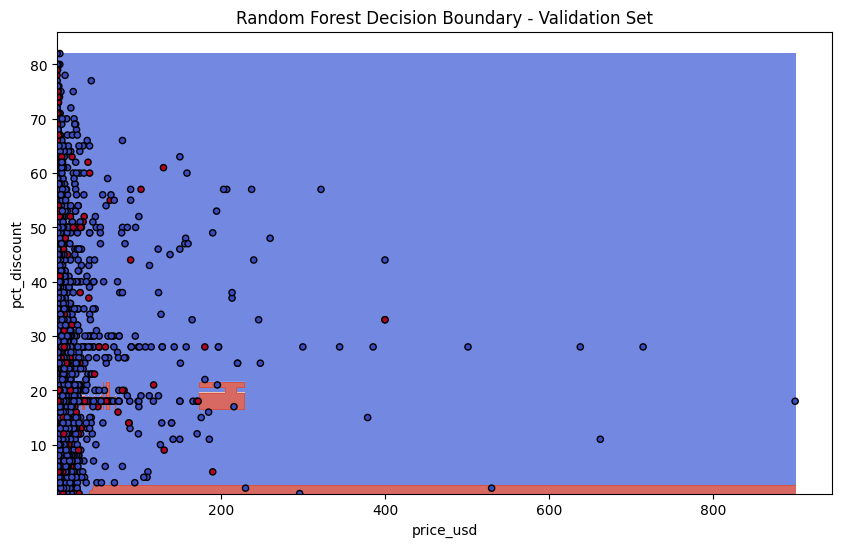

In [65]:
plot_decision_boundary(X_vld, y_vld, rf_pipeline, "Random Forest Decision Boundary - Validation Set")

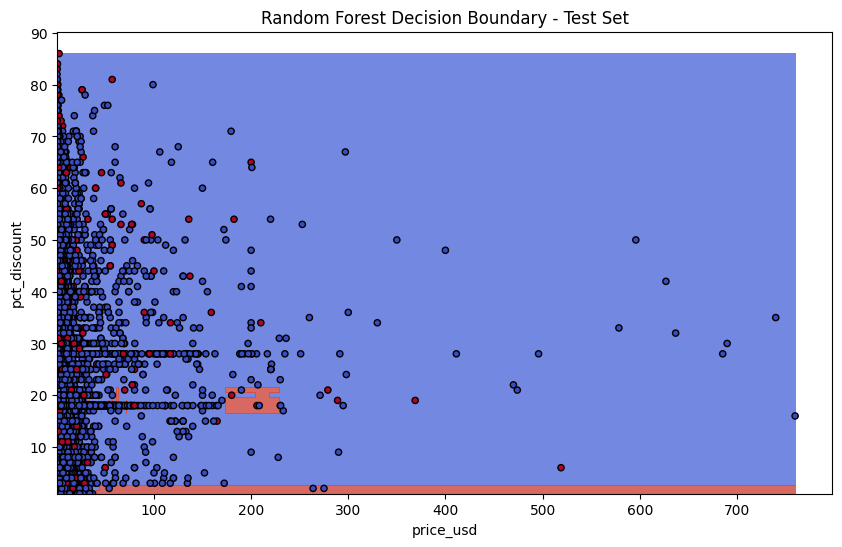

In [66]:
plot_decision_boundary(X_test, y_test, rf_pipeline, "Random Forest Decision Boundary - Test Set")

## 4.4 Observations

### Logistic Regression

**Validation Set:**
- **Accuracy:** The logistic regression model achieved a validation accuracy of approximately `0.75`.
- **Precision, Recall, F1-Score:**
    - For the class `0` (not a best seller), the precision is high, indicating that when the model predicts a product is not a best seller, it is usually correct.
    - The recall for class `0` is also high, meaning the model correctly identifies most of the non-best seller products.
    - For the class `1` (best seller), the precision is lower, indicating some false positives.
    - The recall for class `1` is moderate, suggesting the model misses some best seller products.
    - The F1-score, which balances precision and recall, is higher for class `0` than for class `1`.

**Test Set:**
- **Accuracy:** The logistic regression model achieved a testing accuracy of approximately `0.74`.
- **Precision, Recall, F1-Score:**
    - Similar trends are observed as in the validation set.
    - The model performs better in identifying non-best sellers compared to best sellers.

### Random Forest Classifier

**Validation Set:**
- **Accuracy:** The random forest model achieved a validation accuracy of approximately `0.80`.
- **Precision, Recall, F1-Score:**
    - For the class `0`, both precision and recall are very high, indicating the model is very effective at identifying non-best sellers.
    - For the class `1`, the precision is moderate, but the recall is lower than for class `0`, indicating some false negatives.
    - The F1-score is higher for class `0` than for class `1`.

**Test Set:**
- **Accuracy:** The random forest model achieved a testing accuracy of approximately `0.79`.
- **Precision, Recall, F1-Score:**
    - Similar trends are observed as in the validation set.
    - The model performs better in identifying non-best sellers compared to best sellers.

### Comparison and Contrast

- **Accuracy:** The random forest classifier outperforms the logistic regression model in both validation and test sets.
- **Precision and Recall:**
    - Both models have higher precision and recall for class `0` (non-best sellers) compared to class `1` (best sellers).
    - The random forest classifier has higher precision and recall for class `0` compared to logistic regression, indicating it is better at identifying non-best sellers.
    - For class `1`, the random forest classifier has slightly better precision but similar recall compared to logistic regression.
- **F1-Score:** The F1-score for class `0` is higher in the random forest classifier, indicating better overall performance in identifying non-best sellers. For class `1`, the F1-score is similar between the two models.

### Decision Boundaries

- Neither of the plots show linearly separable decision boundaries, showing that neither model can perfectly classify the data into Best Seller or Non Best Seller classes.

### Brief Analysis

Generally, the random forest classifier demonstrates better performance in terms of accuracy, precision, recall, and F1-score compared to the logistic regression model. It is more effective at identifying non-best sellers and captures more complex relationships in the data. However, both models show room for improvement in identifying best sellers, as indicated by the lower precision and recall for class `1`.

# 5. Conclusion

The results indicate that the Random Forest model provides consistently stronger performance than the Logistic Regression model when it comes to predicting whether a product is a best seller. Across both validation and test sets, the Random Forest achieves higher accuracy and does a better job of correctly identifying non-best sellers, as shown by its better precision and recall in that category. In comparison, the Logistic Regression model, though simpler and more transparent, appears less effective at picking up on the patterns that differentiate best sellers from other products. Both models, however, encounter difficulty in accurately classifying best sellers. This suggests that the features currently used may not fully capture consumer trends that lead a product to become a Best Seller.

From our analysis of this e-commerce data, we learned that both Logistic Regression and Random Forest models can predict product success with decent accuracy, though they worked better at identifying non-bestsellers than bestsellers. The data showed that lower prices and higher discounts often lead to bestseller status. Some product categories naturally perform better than others as bestsellers. While our models worked reasonably well, they struggled somewhat with the uneven distribution of bestsellers versus regular products in our dataset. This suggests that gathering more data about bestsellers or using different techniques to handle this imbalance could improve future predictions. The project demonstrated that machine learning can help identify factors that contribute to product success in e-commerce; however, more research into this topic is required to come to concrete conclusions about the specific factors that influence consumer behavior.

# 6. References

Oleksii Martusiuk. “[70,000+ Products] E-Commerce Data CLEAN.” Kaggle.com, 2024, www.kaggle.com/datasets/oleksiimartusiuk/80000-products-e-commerce-data-clean/data. Accessed 6 Dec. 2024.

Generative AI was partially used to help brainstorm ideas, refine research topics, and interpret results.